<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
import scipy
import netCDF4 as nc
import csv
from numpy import arange, dtype 
import xarray as xr
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20) 
pd.options.display.float_format = '{:.3f}'.format # to get rid of logarithmic values

# Data Gathering

In [69]:
df=pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/Assigments/Assigment-1/car_dataset.csv")
df=pd.DataFrame(df)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [71]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [72]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [73]:
df["car_age"]=2022-df["Year"]
df.drop(columns ="Year", axis=1, inplace=True)

In [74]:
for i in df.drop(columns=["Selling_Price","Car_Name","Fuel_Type","Seller_Type","Transmission"]):
    print(f"corr between Selling_Price and {i:<15}: {df.Selling_Price.corr(df[i])}")

corr between Selling_Price and Present_Price  : 0.8789825451614951
corr between Selling_Price and Kms_Driven     : 0.029187090674291236
corr between Selling_Price and Owner          : -0.0883440990872023
corr between Selling_Price and car_age        : -0.23614098016042756


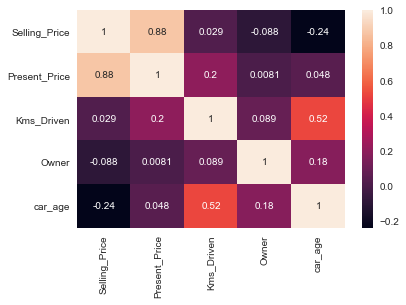

In [75]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [76]:
df.drop(columns=["Car_Name"], inplace=True) # Because there is no relationship between Car_Name and Selling_Price

In [77]:
df=pd.get_dummies(df, drop_first=True)

In [78]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.350,5.590,27000,0,8,0,1,0,1
1,4.750,9.540,43000,0,9,1,0,0,1
2,7.250,9.850,6900,0,5,0,1,0,1
3,2.850,4.150,5200,0,11,0,1,0,1
4,4.600,6.870,42450,0,8,1,0,0,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   car_age                 301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


### Features and target variable

In [80]:
X = df.drop("Selling_Price", axis=1) # Features
y = df["Selling_Price"] # Target

### Splitting data into training and testing

In [45]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [82]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True).fit(X_train,y_train)

In [83]:
X_train

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
273,7.500,61203,0,12,0,1,0,1
260,13.600,29223,0,6,0,1,0,1
211,14.790,43535,0,7,1,0,0,1
134,0.810,11800,0,5,0,1,1,1
11,10.380,51000,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
8,8.890,20273,0,6,1,0,0,1
73,5.710,43000,0,11,0,1,0,1
118,1.470,26000,0,7,0,1,1,1
189,0.570,55000,0,17,0,1,1,1


In [84]:
X_test

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
67,20.450,59000,0,12,1,0,0,1
99,20.450,50024,0,12,1,0,0,1
266,7.000,35000,0,8,0,1,0,1
222,7.600,77632,0,8,1,0,0,1
24,4.410,56879,0,9,0,1,0,1
...,...,...,...,...,...,...,...,...
25,4.990,20000,0,11,0,1,0,1
181,0.480,50000,0,6,0,1,1,1
194,0.787,50000,0,14,0,1,1,1
127,0.800,7000,0,6,0,1,1,1


##  Model Building (Linear Regression)

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [86]:
model.fit(X_train, y_train)

LinearRegression()

# Interpret the model

In [87]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [88]:
coef=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coef

,Coefficient
Present_Price,0.445
Kms_Driven,-0.000
Owner,-0.814
car_age,-0.319
Fuel_Type_Diesel,2.619
Fuel_Type_Petrol,0.606
Seller_Type_Individual,-1.220
Transmission_Manual,-1.009


In [89]:
# it is the intercept point from the regression equation. When x=0, y equals ...

model.intercept_

4.92347681613604

# Model Evaluation

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [91]:
y_pred=model.predict(X_test)
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [92]:
my_dict = {"Actual (Train)": y_test, "Pred (Test)": y_pred, "Residual":y_test-y_pred}

comparison = pd.DataFrame(my_dict)
comparison

,Actual (Train),Pred (Test),Residual
67,9.250,10.707,-1.457
99,9.650,10.875,-1.225
266,3.650,4.431,-0.781
222,6.000,5.913,0.087
24,2.900,2.549,0.351
...,...,...,...
25,3.000,2.859,0.141
181,0.300,0.665,-0.365
194,0.200,-1.750,1.950
127,0.750,1.612,-0.862


In [95]:
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

print("Model testing performance:")
print("-------------------------")
print('RMSE is {:29}'.format(rmse))
print("MAE is {:30}".format(mae))
print('R2 score is {:26}'.format(R2_score))

Model testing performance:
-------------------------
RMSE is             1.946054013887627
MAE is             1.1811769157077154
R2 score is         0.8589039971922925


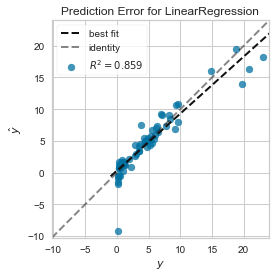

In [97]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [98]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted
67,9.250,10.707
99,9.650,10.875
266,3.650,4.431
222,6.000,5.913
24,2.900,2.549
...,...,...
90,3.800,7.500
93,23.000,18.190
62,18.750,19.543
123,1.000,0.214


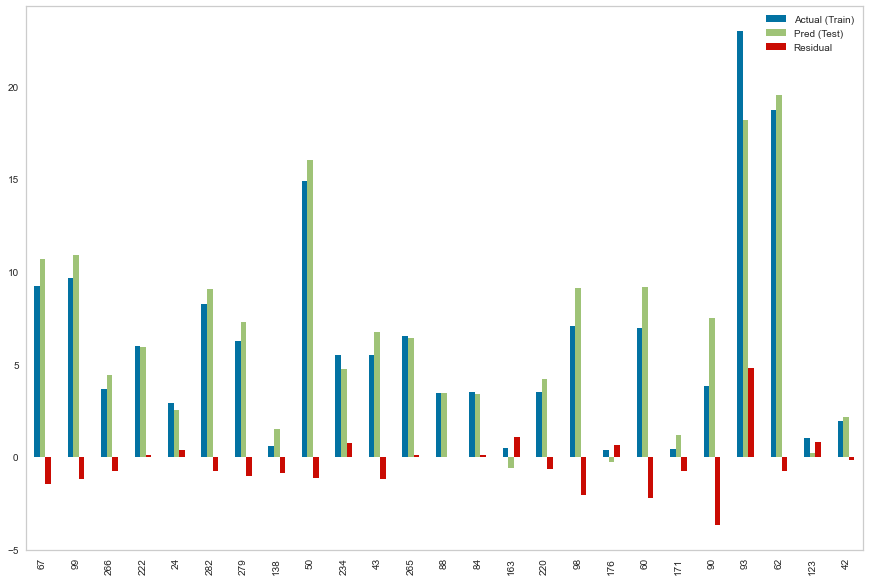

In [94]:
comparison.head(25).plot(kind ="bar", figsize=(15,10))
plt.grid(linestyle=":", linewidth="1.5")
plt.show();

# Regularization

# Ridge

In [102]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [103]:
def show_metrics(y_test,y_pred):
    
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)

    print("Model testing performance:")
    print("-------------------------")
    print("RMSE is {:29}".format(rmse))
    print("MAE is {:30}".format(mae))
    print("R2 score is {:26}".format(R2_score))

In [104]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [105]:
show_metrics(y_test,y_pred)

Model testing performance:
-------------------------
RMSE is            1.9467313762399918
MAE is             1.1766004559632803
R2 score is         0.8588057576236674


In [65]:
ridge_model.alpha

1.0

In [106]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [107]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [108]:
ridgecv.alpha_

0.1

In [109]:
alpha_space = np.linspace(0.01, 10, 100)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [110]:
ridgecv.alpha_

0.21181818181818182

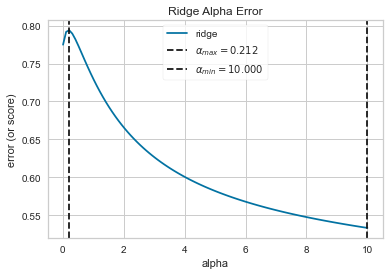

In [112]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show();

In [113]:
y_pred=ridgecv.predict(X_test)

In [114]:
show_metrics(y_test,y_pred)

Model testing performance:
-------------------------
RMSE is            1.8181292744462778
MAE is              1.138251073675334
R2 score is         0.8768443191837142


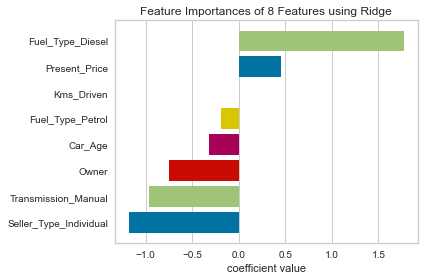

In [115]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();

# Lasso

In [116]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
-------------------------
RMSE is             4.844430603529284
MAE is              3.198316612453815
R2 score is        0.12563974476813833


In [117]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [118]:
y_pred=lasso_cv_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
-------------------------
RMSE is            1.9323214066935657
MAE is              1.172668171262711
R2 score is         0.8608882992084925


In [119]:
lasso_cv_model.alpha_

0.001

In [120]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [121]:
def evaluate_model(Model, lambdas):
    training_errors = [] 
    testing_errors = [] 
    for l in lambdas:

        model = Model(alpha=l) 
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

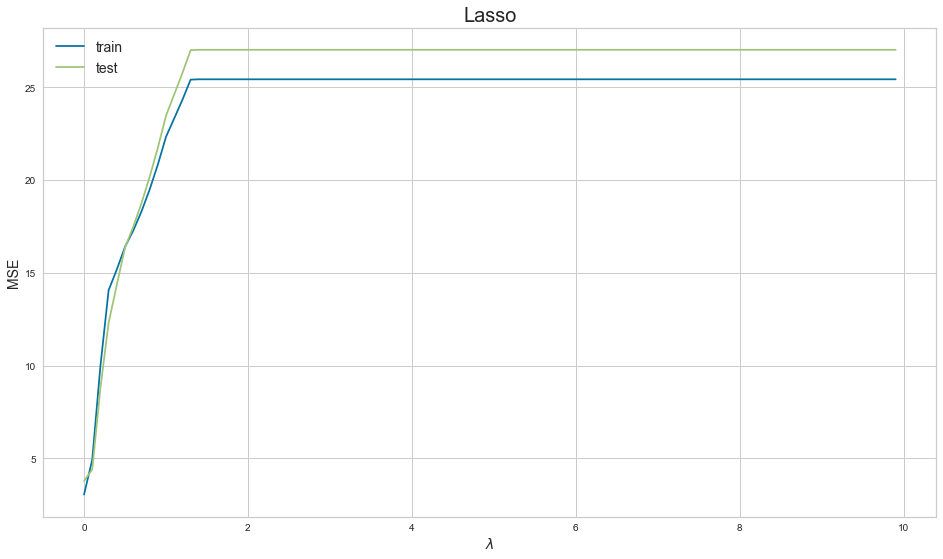

In [122]:
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")